In [1]:
from tqdm import tqdm
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

# X_train and Y_train Process

In [2]:
DATADIR = '/home/vinicius/Documents/DataBase/Images_Dataset/Cat_x_Dog_with_numbers'
CATEGORIES = ['Cat', 'Dog']
IMG_SIZE = 200
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

100%|██████████| 1000/1000 [00:01<00:00, 942.44it/s]


In [3]:
random.shuffle(training_data)

x = []
y = []
for features, labels in training_data:
    x.append(features)
    y.append(labels)

x = np.array(x).reshape(-1, IMG_SIZE * IMG_SIZE)
X_train = x.T

print('####################################################\n')
print('O tamanho da nossa entrada é: {}'.format(X_train.shape), '\n')

y = np.array(y).reshape(1, -1)
Y_train = y

print('####################################################\n')
print('O tamanho da nossa saída rotulada é: {}'.format(Y_train.shape))

####################################################

O tamanho da nossa entrada é: (40000, 1995) 

####################################################

O tamanho da nossa saída rotulada é: (1, 1995)


# X_test and Y_test Process

In [4]:
DATADIR = '/home/vinicius/Documents/DataBase/Images_Dataset/Cat_x_Dog_with_numbers'
CATEGORIES = ['Cat_test', 'Dog_test']
IMG_SIZE = 200
testing_data = []

def create_testing_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                testing_data.append([new_array, class_num])
            except Exception as e:
                pass
create_testing_data()

100%|██████████| 300/300 [00:00<00:00, 914.98it/s]


In [5]:
random.shuffle(testing_data)

x = []
y = []
for features, labels in testing_data:
    x.append(features)
    y.append(labels)

x = np.array(x).reshape(-1, IMG_SIZE * IMG_SIZE)
X_test = x.T

print('####################################################\n')
print('O tamanho da nossa entrada nos testes é: {}'.format(X_test.shape), '\n')

y = np.array(y).reshape(1, -1)
Y_test = y

print('####################################################\n')
print('O tamanho da nossa saida rotulada em testes é: {}'.format(Y_test.shape), '\n')  #y_hat

####################################################

O tamanho da nossa entrada nos testes é: (40000, 600) 

####################################################

O tamanho da nossa saida rotulada em testes é: (1, 600) 



# Normalization os input data

In [6]:
X_train = X_train / 255
X_test = X_test / 255

# Sigmoid Function

In [7]:
def sigmoid(z):
    """
    Esta é a nossa função de ativação que será utilizada no cálculo do valor de z
    """
    sigmoid = 1 / (1 + np.exp(-z))
    return sigmoid

# Initialization of W and b parameters

In [8]:
def initialize_with_zeros(dim):
    """
    O parâmetro w tem tamanho dado por dim sendo o valor do número total de pixels da imagem,
    ou seja, IMG_SIZE * IMG_SIZE.
    """
    w = np.zeros(shape = (dim, 1))
    b = 0
    return w, b

# Forward and Backward Propagation

In [9]:
def propagation(w, b, X, Y):
    """
    Realizaremos os cálculos referentes à propagação e retropropagação.
    
    dz = (A - Y), dz é um valor de derivada calculado na retropropagação.
    """
    m = X.shape[1]        #número de exemplos
    
    #FORWARD
    A = sigmoid(np.dot(w.T, X) + b)
    cost = (-1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))
    
    #BACKWARD
    dw = (1 / m) * (np.dot(X , (A - Y).T))
    db = (1 / m) * (np.sum(A - Y))
    
    cost = np.squeeze(cost)
    
    gradientes = {'dw': dw, 'db': db}
    
    return gradientes, cost

# Optimization

In [10]:
def optimization(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    A otimização fará a atualização dos nossos parâmetros w e b para encontrar o mínimo
    global da nossa função de custo.
    
    A codificação com condição "if"apresentada abaixo é para printar apenas
    depois de 100 iterações.
    """
    costs_list = []
    
    for i in range(num_iterations):
        gradientes, cost = propagation(w, b, X, Y)
        
        dw = gradientes['dw']
        db = gradientes['db']
        
        w = w - (learning_rate * dw)
        b = b - (learning_rate * db)
        
        if i % 100 == 0:
            costs_list.append(cost)
        if print_cost and i % 100 == 0:
            print ('Valor da função de custo após a {}ª iteração: {}'.format(i, cost))
        parametros = {'w': w, 'b': b}
        gradientes = {'dw': dw, 'db': db}
    
    return parametros, gradientes, costs_list

# Predicts

In [11]:
def predict(w, b, X):
    """
    As predições são feitas com base nos resultados da função de ativação, que gera os
    valores damatriz A que é de uma linha e m colunas, ela percorre cada valor
    das m colunas e verifica o valor presente nessa coluna de A.
    """
    m = X.shape[1]
    Y_predict = np.zeros(shape = (1, m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):       #A.shape[1] corresponde ao número de exemplos
        if A[0, i] > 0.5:
            Y_predict[0, i] = 1
        else:
            0
    return Y_predict

# Model

In [12]:
def model(X_train, Y_train, X_test, Y_Test, num_iterations, learning_rate, print_cost = False):
    """
    Nosso modelo é responsável por utilizar os valores de entrada normalizadosde treino e teste,
    para obter a predição de Y, e compararmos com o valor real já rotulado, no processamento
    do Y_train e Y_test.
    """
    w, b = initialize_with_zeros(X_train.shape[0])
    
    parametros, gradientes, costs_list = optimization(w, b, X_train, Y_train, 
                                                num_iterations, learning_rate, print_cost)
    
    w = parametros['w']
    b = parametros['b']
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    print('Acurácia treino: {} %'.format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print('Acurácia teste: {} %'.format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    resultado = {'custo': costs_list,
                'Predições no teste': Y_prediction_test,
                'Predições no treino': Y_prediction_train,
                'w': w, 'b': b,
                'Learning rate': learning_rate,
                'Numero de iterações': num_iterations}
    
    return resultado

In [13]:
resultado = model(X_train, Y_train, X_test, Y_test, num_iterations = 10000, learning_rate = 0.001, print_cost = True)

Valor da função de custo após a 0ª iteração: 0.6931471805599454
Valor da função de custo após a 100ª iteração: 0.7698717820376063
Valor da função de custo após a 200ª iteração: 0.7448735444234976
Valor da função de custo após a 300ª iteração: 0.7277414662241531
Valor da função de custo após a 400ª iteração: 0.7141692326882939
Valor da função de custo após a 500ª iteração: 0.7025876845413818
Valor da função de custo após a 600ª iteração: 0.6923178536881545
Valor da função de custo após a 700ª iteração: 0.6829976093281018
Valor da função de custo após a 800ª iteração: 0.6744023214490931
Valor da função de custo após a 900ª iteração: 0.6663794018115444
Valor da função de custo após a 1000ª iteração: 0.658819476357235
Valor da função de custo após a 1100ª iteração: 0.651641457409242
Valor da função de custo após a 1200ª iteração: 0.6447838331995911
Valor da função de custo após a 1300ª iteração: 0.6381991496935764
Valor da função de custo após a 1400ª iteração: 0.6318503167154839
Valor da 

# Cost Function graph

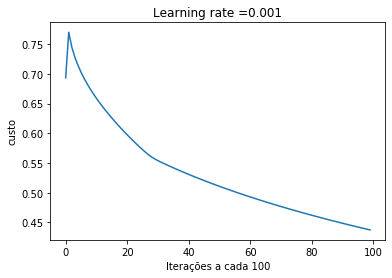

In [14]:
custo = np.squeeze(resultado['custo'])
plt.plot(custo)
plt.ylabel('custo')
plt.xlabel('Iterações a cada 100')
plt.title("Learning rate =" + str(resultado["Learning rate"]))
plt.show()

# Image test from X_test

Y rotulado nos testes = 0, você preveu ser "0.0


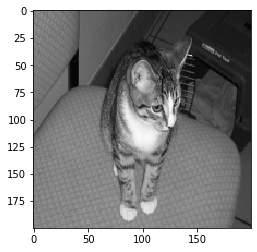

In [68]:
index = 400
plt.imshow(X_test[:,index].reshape((IMG_SIZE, IMG_SIZE)), cmap = 'gray')
print ("Y rotulado nos testes = " + str(Y_test[0,index]) + ", você preveu ser \"" + str(resultado["Predições no teste"][0,index]))

# Test your own image

O algoritmo previu sendo:  0


<function matplotlib.pyplot.show(*args, **kw)>

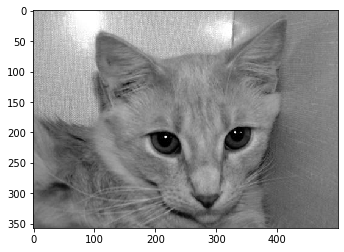

In [103]:
image = cv2.imread('my_image_1', cv2.IMREAD_GRAYSCALE)    #imagem deve estar na mesma pasta
image = image / 255
my_image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
teste = np.array(my_image).reshape(-1, IMG_SIZE * IMG_SIZE)
Imagem_final = teste.T
my_predicted_image = predict(resultado["w"], resultado["b"], Imagem_final)
print("O algoritmo previu sendo: ", int(np.squeeze(my_predicted_image)))
plt.imshow(image, cmap = 'gray')
plt.show